# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [2]:
#import packages
import pandas as pd
from plotnine import *
#import the titanic dataset here
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
#filter
passengers = df_titanic[(df_titanic["class"] == "1st") | (df_titanic["class"] == "2nd") | (df_titanic["class"] == "3rd")]
passengers
pd.crosstab(passengers["embarked"], passengers["class"], margins = True)

class,1st,2nd,3rd,All
embarked,,,,
B,3,6,0,9
C,143,26,102,271
Q,3,7,113,123
S,175,245,494,914
All,324,284,709,1317


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [4]:
#conditional distribution of class given where they embarked
class_em = pd.crosstab(passengers["embarked"], passengers["class"], margins=True, normalize="index")
print(class_em)
#conditional distribution of where they embarked given their class
em_class = pd.crosstab(passengers["class"], passengers["embarked"], margins=True, normalize="index")
print(em_class)
#proportion of 3rd class embarked at southampton
prop1 = 494/709
print("The proportion of 3rd class passengers who embarked at Southampton is: ", prop1)
#proportion of southampton passengers in 3rd class
prop2 = 494/914
print("The proportion of Southampton passengers who were in 3rd class is: ", prop2)

class          1st       2nd       3rd
embarked                              
B         0.333333  0.666667  0.000000
C         0.527675  0.095941  0.376384
Q         0.024390  0.056911  0.918699
S         0.191466  0.268053  0.540481
All       0.246014  0.215642  0.538345
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756
All       0.006834  0.205771  0.093394  0.694002
The proportion of 3rd class passengers who embarked at Southampton is:  0.6967559943582511
The proportion of Southampton passengers who were in 3rd class is:  0.5404814004376368
class          1st       2nd       3rd
embarked                              
B         0.333333  0.666667  0.000000
C         0.527675  0.095941  0.376384
Q         0.024390  0.056911  0.918699
S         0.191466  0.268053  0.540481
All       0.246014  0

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

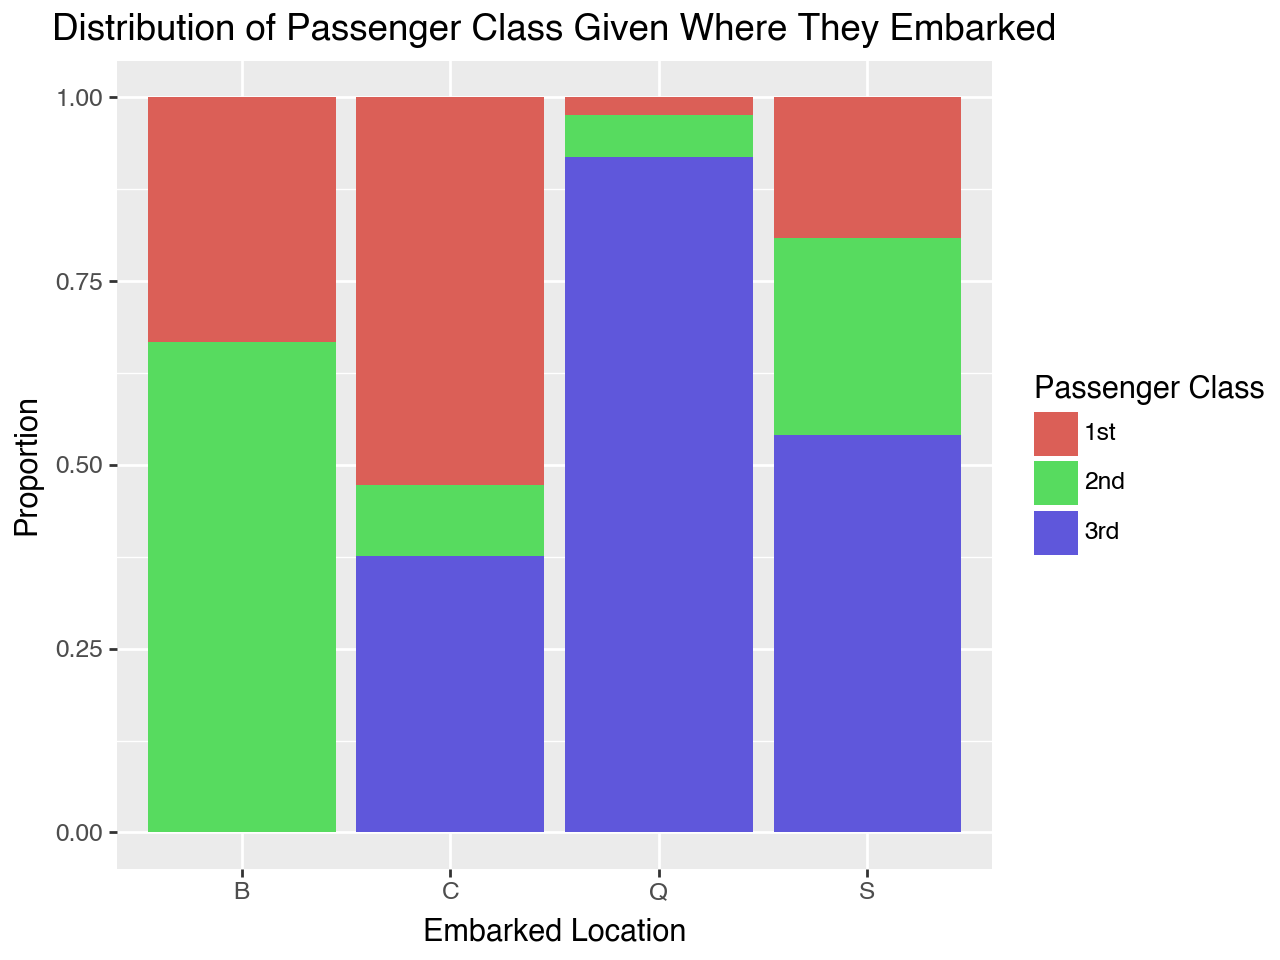

In [5]:
(ggplot(passengers, aes(x='embarked', fill='class'))
        + geom_bar(position='fill')
        + labs(title='Distribution of Passenger Class Given Where They Embarked',
               x='Embarked Location',
               y='Proportion',
               fill='Passenger Class')
)